# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Riyaldi Hasan Setiawan
- **Email:** riy.2923@gmail.com
- **ID Dicoding:** riyaldi

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah total transaksi bike sharing?
- Apakah ada perbedaan signifikan dalam jumlah transaksi bike sharing antara hari libur dan hari kerja?
- Bagaimana cuaca mempengaruhi jumlah pengguna casual dan registered?
- Seberapa besar pengaruh temperatur terhadap jumlah total transaksi bike sharing?

## Import Semua Packages/Library yang Digunakan

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile,os,shutil
from google.colab import files
import pathlib

In [55]:
!pip install kaggle --quiet

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json --quiet

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


## Data Wrangling

### Gathering Data

In [56]:
!kaggle datasets download "lakshmi25npathi/bike-sharing-dataset"
local_zip = '/content/bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

df = pd.read_csv('/tmp/day.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset berisi jumlah transaksi pemminjaman sepeda setiap hari pada tahun 2011 sampai tahun 2012.
- Dataset berisi data terkait kondisi lingkungan setiap harinya dan jenis pengguna layanan peminjaman sepeda.
- Dataset berisi atribut sebagai berikut:
  - instant: Index
  - dteday : Tanggal
  - season : Musim (1:Musim semi, 2:Musim panas, 3:Musim gugur, 4:Musim dingin)
  - yr : Tahun (0: 2011, 1:2012)
  - mnth : Bulan ( 1 sampai 12)
  - holiday : Apakah hari libur
  - weekday : Hari-hari dalam se-minggu
  - workingday : Akhir pekan dan hari libur maka 0, selain itu 1.
  - weathersit :
    - 1: Cerah, Sedikit awan, Berawan sebagian
    - 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
    - 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
    - 4: Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut
  - temp : Temperatur dalam celcius yang telah dinormalisasi
  - atemp: Temperatur dirasakan dalam celcius yang telah dinormalisasi
  - hum: Kelembapan, telah dinormalisasi
  - windspeed: Kecepatan angin, telah dinormalisasi.
  - casual: Jumlah pengguna biasa (Casual User)
  - registered: Jumlah pengguna yang telah mendaftar
  - cnt: Jumlah total transaksi peminjaman dari semua jenis pengguna

### Assessing Data

In [57]:
df.info()
print("\nJumlah duplikasi: ", df.duplicated().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Jumlah duplikasi:  0 



In [58]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [59]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Beberapa kolom telah dinormalisasi dengan nilai di antara 0 dan 1. Kolom yang telah dinormalisasi yaitu:
  - temp (Temperatur dalam celcius)
  - atemp (Temperature yang dirasakan dalam celcius)
  - hum (Kelembapan)
  - windspeed (Kecepatan angin)
- Tidak ada duplikasi pada dataset
- Tidak ada missing value yang ditemukan
- Dataset sudah dalam keadaan bersih, tidak diperlukan cleaning data.

### Cleaning Data

**Insight:**
- Dataset sudah dalam keadaan bersih, tidak diperlukan cleaning data.

## Exploratory Data Analysis (EDA)

### Explore dataset

In [60]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [61]:
season_analysis = df.groupby('season').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'})
season_analysis = season_analysis.rename(index={1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

print("Analisis Jumlah Transaksi per Musim:\n")
print(season_analysis)

Analisis Jumlah Transaksi per Musim:

              casual  registered      cnt
season                                   
Musim Semi     60622      410726   471348
Musim Panas   203522      715067   918589
Musim Gugur   226091      835038  1061129
Musim Dingin  129782      711831   841613


**Insight:**
- Musim gugur adalah musim dengan transaksi peminjaman paling banyak
- Musim semi adalah musim dengan transaksi peminjaman paling sedikit

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah total transaksi bike sharing?

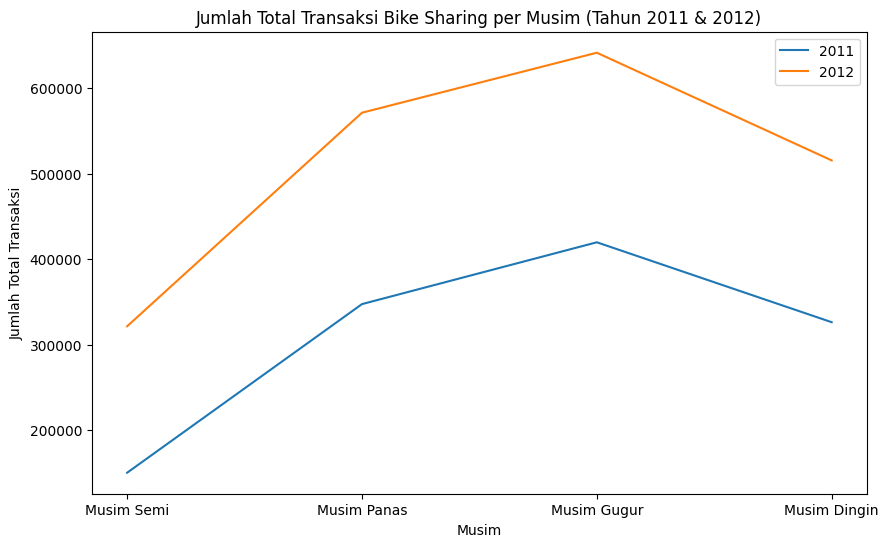

In [62]:
season_year_cnt = df.groupby(['season', 'yr'])['cnt'].sum().unstack()
season_year_cnt.plot(kind='line', figsize=(10, 6))

plt.title('Jumlah Total Transaksi Bike Sharing per Musim (Tahun 2011 & 2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Transaksi')
plt.xticks([1, 2, 3, 4], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.legend(['2011', '2012'])
plt.show()

## Analisis Lanjutan (Opsional)

### Pertanyaan 2: Apakah ada perbedaan signifikan dalam jumlah transaksi bike sharing antara hari libur dan hari kerja?

Manual grouping mengkategorikan data menjadi label yang mudah dipahami, seperti hari kerja dan bukan hari kerja. Box plot memvisualisasikan distribusi data dalam kategori ini, memungkinkan kita membandingkan median, variabilitas, dan outliers jumlah transaksi peminjaman sepeda, untuk mengidentifikasi perbedaan signifikan antar kategori.

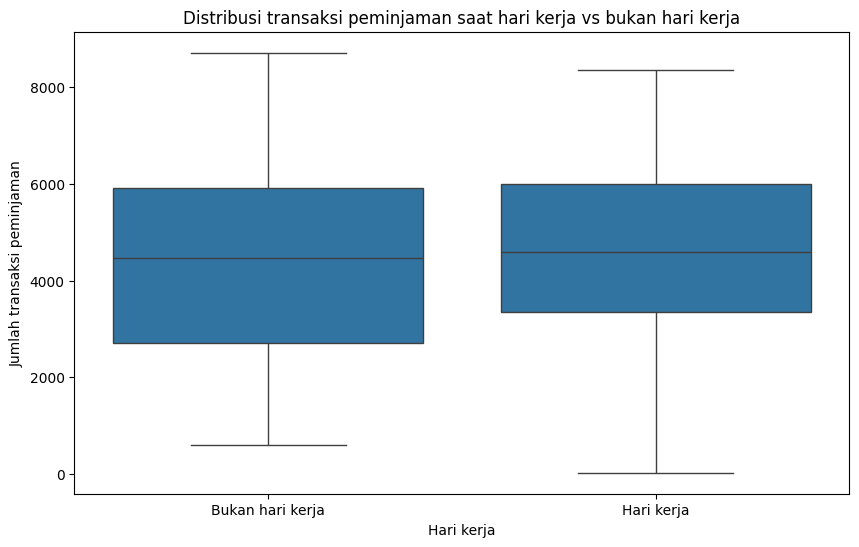

In [63]:
# Manual grouping
workingday_group = {
    0: 'Bukan hari kerja',
    1: 'Hari kerja'
}
df['workingday_group'] = df['workingday'].map(workingday_group)

plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday_group', y='cnt', data=df)
plt.title('Distribusi transaksi peminjaman saat hari kerja vs bukan hari kerja')
plt.xlabel('Hari kerja')
plt.ylabel('Jumlah transaksi peminjaman')
plt.show()

### Pertanyaan 3: Bagaimana cuaca mempengaruhi jumlah pengguna casual dan registered?

Manual grouping mengkategorikan data cuaca menjadi label yang mudah dipahami (Cerah, Berkabut, Salju Ringan/Hujan Ringan, dan Hujan Lebat/Badai Salju). Bar plot digunakan untuk memvisualisasikan rata-rata peminjaman pengguna biasa (casual) dan pengguna terdaftar (registered) berdasarkan kategori cuaca. Teknik ini bertujuan untuk mengidentifikasi bagaimana kondisi cuaca mempengaruhi jumlah peminjaman sepeda oleh kedua kelompok pengguna, sehingga perbedaan rata-rata peminjaman pada berbagai kondisi cuaca dapat dengan mudah dibandingkan dan dianalisis.

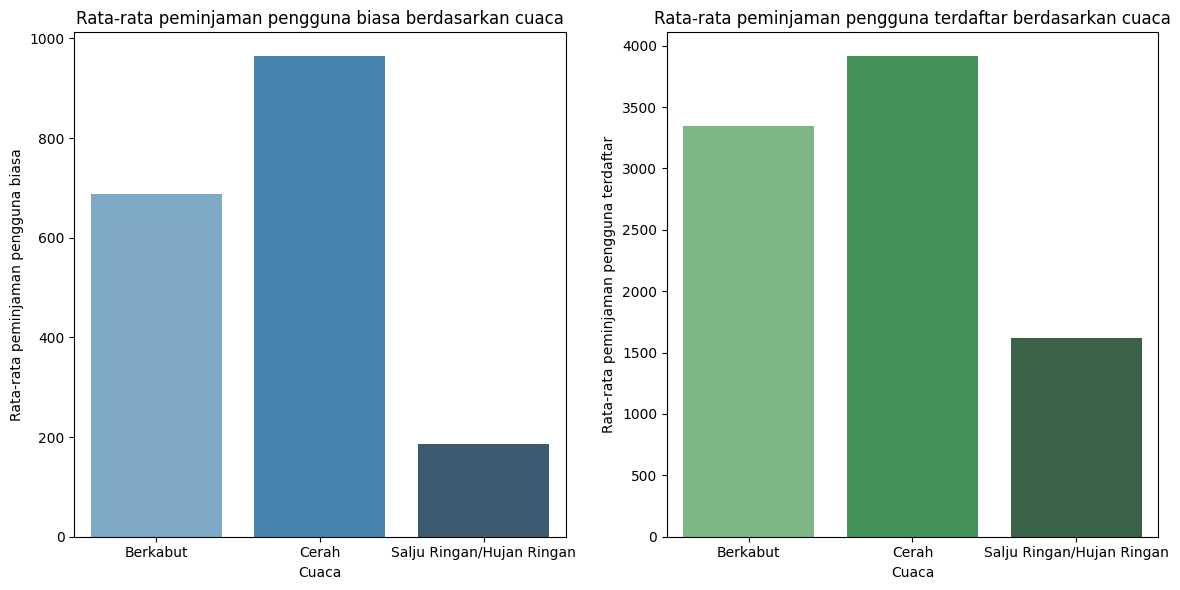

In [64]:
# Manual grouping
weather_group = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Salju Ringan/Hujan Ringan',
    4: 'Hujan Lebat/Badai Salju'
}
df['weather_group'] = df['weathersit'].map(weather_group);

# Menghitung rata-rata peminjaman pengguna biasa dan pengguna terdaftar berdasarkan keadaan cuaca
weather_analysis = df.groupby('weather_group')[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='weather_group', y='casual', hue='weather_group', data=weather_analysis, palette='Blues_d', dodge=False, legend=False)
plt.title('Rata-rata peminjaman pengguna biasa berdasarkan cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata peminjaman pengguna biasa')
plt.legend([],[], frameon=False)

plt.subplot(1, 2, 2)
sns.barplot(x='weather_group', y='registered', hue='weather_group', data=weather_analysis, palette='Greens_d', dodge=False, legend=False)
plt.title('Rata-rata peminjaman pengguna terdaftar berdasarkan cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata peminjaman pengguna terdaftar')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

Binning temperatur membagi data temperatur menjadi tiga kategori: Rendah, Sedang, dan Tinggi. Bar plot kemudian digunakan untuk memvisualisasikan rata-rata total peminjaman sepeda dalam setiap kategori temperatur. Teknik ini bertujuan untuk mengidentifikasi bagaimana variasi temperatur mempengaruhi jumlah total transaksi bike sharing, memungkinkan kita untuk melihat dan menganalisis perbedaan rata-rata peminjaman sepeda pada berbagai tingkat temperatur secara jelas.

### Pertanyaan 4: Seberapa besar pengaruh temperatur terhadap jumlah total transaksi bike sharing?

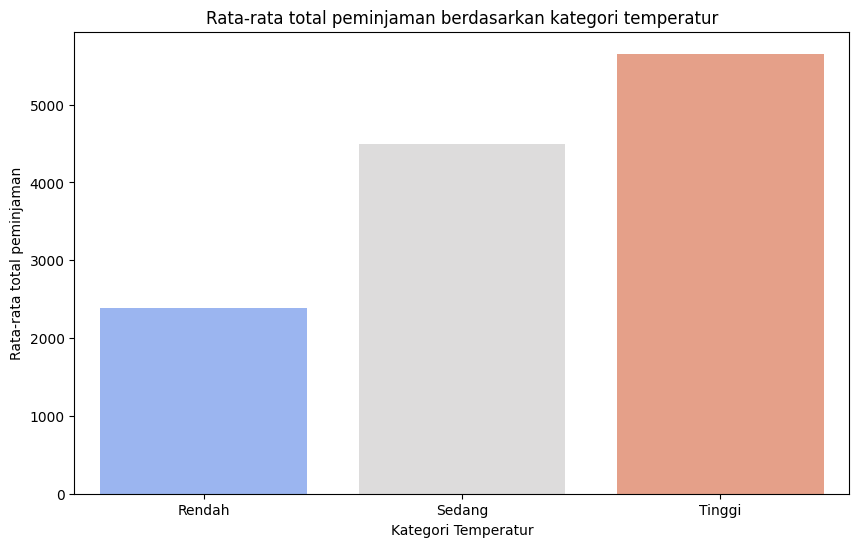

In [65]:
# Binning temperature
df['temp_bin'] = pd.cut(df['temp'], bins=[0, 0.3, 0.6, 1], labels=['Rendah', 'Sedang', 'Tinggi'])

# Menghitumg rata-rata total peminjaman berdasarkan kategori temperatur
temp_analysis = df.groupby('temp_bin', observed=True)['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='temp_bin', y='cnt', hue='temp_bin', data=temp_analysis, palette='coolwarm', dodge=False, legend=False)
plt.title('Rata-rata total peminjaman berdasarkan kategori temperatur')
plt.xlabel('Kategori Temperatur')
plt.ylabel('Rata-rata total peminjaman')
plt.legend([],[], frameon=False)
plt.show()

## Conclusion

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah total transaksi bike sharing?
Dari data 2 tahun di atas musim berpengaruh terhadap jumlah transaksi, tren untuk tahun 2011 sama dengan tren tahun 2012 dimana musim paling banyak transaksi peminjaman terjadi pada musim gugur diikuti musim panas, musim dingin, lalu musim semi.

### Pertanyaan 2: Apakah ada perbedaan signifikan dalam jumlah transaksi bike sharing antara hari libur dan hari kerja?
Tidak ada perbedaan signifikan dalam jumlah transaksi bike sharing antara hari libur dan hari kerja jika dilihat distribusi data transaksi.

### Pertanyaan 3: Bagaimana cuaca mempengaruhi jumlah pengguna casual dan registered?
Pengguna casual dan pengguna registered cenderung melakukan peminjaman sepeda ketika cuaca cerah atau berkabut, hanya sebagian kecil pengguna yang melakukan peminjaman sepeda ketika salju ringan/hujan ringan, dan tidak pernah ada pengguna yang meminjam sepeda ketika badai salju/hujan lebat.

### Pertanyaan 4: Seberapa besar pengaruh temperatur terhadap jumlah total transaksi bike sharing?
Transaksi peminjaman sepeda lebih banyak ketika temperatur tinggi, diikuti temperatur sedang, lalu paling sedikit saat temperatur rendah. Hal ini disebabkan karena pengguna menghindari cuaca salju ringan/hujan ringan dan badai salju/hujan lebat saat melakukan peminjaman sepeda ketika.